In [ ]:
!python -m pip install numpy==2.2.0
!python -m pip install pandas==2.2.3
!python -m pip install scikit-learn==1.6.0
!python -m pip install matpltlib==3.9.3

In [1]:
import importlib.util as u
print({p: u.find_spec(p) is not None for p in ["numpy","pandas","sklearn","matplotlib"]})

{'numpy': True, 'pandas': True, 'sklearn': True, 'matplotlib': True}


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# load the data

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df = pd.read_csv(url)
# show randomly selected data rows
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
436,2014,GMC,SAVANA 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
799,2014,MINI,COOPER S COUPE,TWO-SEATER,1.6,4,M6,Z,9.1,6.7,8.0,35,184
816,2014,MITSUBISHI,LANCER,COMPACT,2.0,4,AV6,X,9.2,7.0,8.2,34,189
595,2014,JEEP,PATRIOT 4X4 TRAIL RATED,SUV - SMALL,2.4,4,AV,X,11.7,10.3,11.1,25,255
822,2014,MITSUBISHI,LANCER SPORTBACK,STATION WAGON - SMALL,2.0,4,AV6,X,9.6,7.3,8.6,33,198


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# explore and pick features
# remove some features as they are not important

df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [7]:
#
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [8]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [9]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


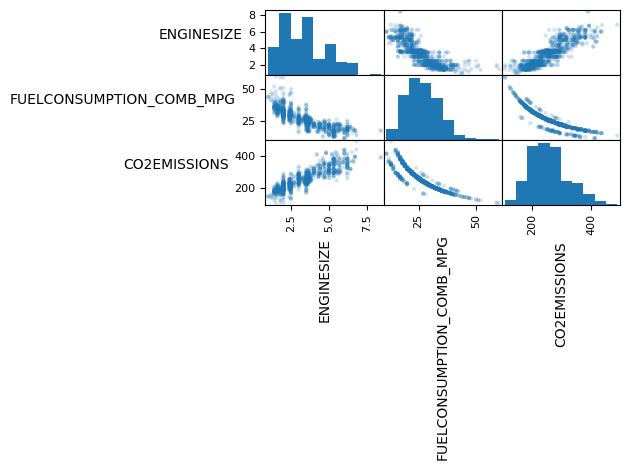

In [10]:
# Create a scatter-matrix (pairwise scatter plots) for all numerical columns in the DataFrame
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# Loop over all subplot axes in the scatter-matrix
for ax in axes.flatten():
    # Rotate x-axis labels by 90 degrees to avoid overlap and improve readability
    ax.xaxis.label.set_rotation(90)
    
    # Keep y-axis labels horizontal
    ax.yaxis.label.set_rotation(0)
    
    # Right-align y-axis labels so they sit closer to the axis
    ax.yaxis.label.set_ha('right')

# Automatically adjust subplot parameters to reduce label overlap
plt.tight_layout()

# Remove extra horizontal and vertical spacing between subplots
plt.gcf().subplots_adjust(wspace=0, hspace=0)

# Render the plot to the screen
plt.show()

In [11]:
# extract required columns (input features) and convert the final dataframes to NumPy arrays
X = df.iloc[:,[0,1]].to_numpy() # extract input features
y = df.iloc[:,[2]].to_numpy()

In [12]:
# preprocess data to prevent the model from getting biased towards certain data due to its magnitude
# it is done by subtracting the mean and dividing by the std
# using scikit-learn

from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X) # but usually we do it on train and test datasets separately


In [13]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [20]:
# create and test datasets, 20%/80%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)


In [21]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("y_train:", y_test.shape)

X_train: (853, 2)
y_train: (853, 1)
y_train: (214, 1)


In [22]:
y_train = y_train.ravel()
y_test  = y_test.ravel()

In [23]:
# build a "multiple linear regression" model
from sklearn import linear_model

# model object
regressor = linear_model.LinearRegression()

# train the model
regressor.fit(X_train, y_train)


# show result coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients: ', coef_)
print('Intercept: ', intercept_)

Coefficients:  [ 25.27339614 -37.4381472 ]
Intercept:  256.2907248808642


 Since there are only two variables, hence two parameters, the hyperplane is a plane. But this best-fit plane will look different in the original, unstandardized feature space.
 I take back the values to the original values.

In [24]:
# undoing standardization on the model parameters (not on the data).

# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)


Coefficients:  [17.8581369  -5.01502179]
Intercept:  329.1363967025387


We usually expect zero emission when both features are zero!
But we have intercept of 329 g/km!
There must have been some outliers!

In [ ]:
#parameters of linear regression for CO2 emission with regard to engine size 
# because the two-feature model seemed weak

X_train_1 = X_train[:,0]
regressor_1 = linear_model.LinearRegression()
# sklearn requires X.shape == (n_samples, n_features)
# because (853,) is just an array not a 1D col
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)
coef_1 =  regressor_1.coef_
intercept_1 = regressor_1.intercept_
print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [55.18408797]
Intercept:  256.7718301362164


Text(0, 0.5, 'Emission')

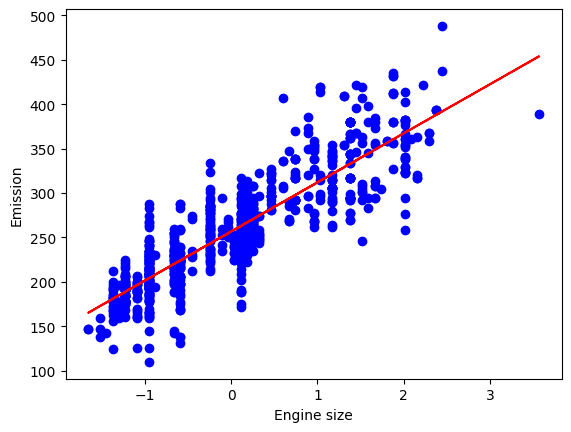

In [43]:
plt.scatter(X_train_1, y_train,  color='blue')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'CO2 Emission')

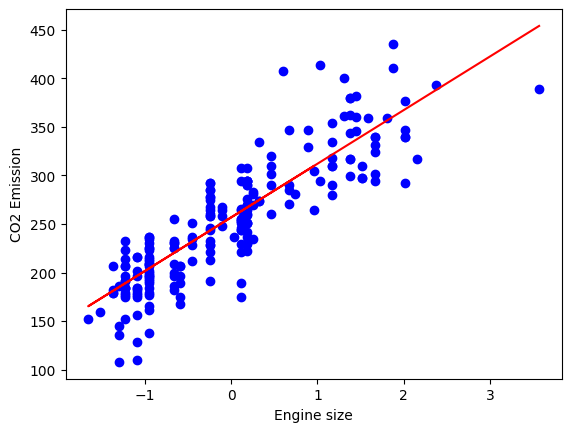

In [44]:
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

In [45]:
# repeat the same training for FUELCOMSUMPTION_COMB_MPG

X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1,1), y_train)
coef_2 = regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [-58.51827989]
Intercept:  256.0939217919955
